# Informe Final: Detección Automática de Textos Tóxicos




# Detección Automática de Textos Tóxicos

## Introducción

Este proyecto tiene como objetivo desarrollar un sistema para la detección automática de textos que contienen lenguaje ofensivo o vulgar. El sistema se basa en técnicas de aprendizaje automático, específicamente en modelos de clasificación basados en árboles de decisión.

## Repositorio del Proyecto

Todo el código fuente asociado a este proyecto está disponibles públicamente en GitHub:

[https://github.com/Jhonfel/toxic-text-detection](https://github.com/Jhonfel/toxic-text-detection)

Por razones de privacidad y limitaciones de espacio, el repositorio de GitHub no incluye:
- Los conjuntos de datos utilizados
- Los modelos entrenados



## Estructura del Proyecto

El proyecto sigue una estructura:

```
toxic-text-detection/
├── 📁 data/
│   ├── 📁 raw/
│   │   └── 📄 data_toxic.csv
│   └── 📁 processed/
├── 📁 notebooks/
│   ├── 📓 01_exploratory_data_analysis.ipynb
│   ├── 📓 02_feature_engineering.ipynb
│   ├── 📓 03_model_development.ipynb
│   └── 📓 04_model_evaluation.ipynb
│   └── 📓 05_experiment_bert.ipynb
├── 📁 src/
│   └── 📁 toxic_text_detection/
│       ├── 📄 __init__.py
│       ├── 📄 data_processing.py
│       ├── 📄 feature_engineering.py
│       └── 📄 model.py
├── 📁 tests/
│   ├── 📄 __init__.py
│   ├── 📄 test_data_processing.py
│   ├── 📄 test_feature_engineering.py
│   └── 📄 test_model.py
├── 📁 models/
│   └── 📄 best_model.pkl
├── 📁 reports/
│   └── 📓 final_report.ipynb
├── 📁 app/
│   └── 📄 app.py
├── 📄 requirements.txt
├── 📄 README.md
├── 📄 .gitignore
├── 📄 setup.py
└── 📄 Dockerfile
```

## Desarrollo y Documentación

El proceso de desarrollo se ha desarrollado detalladamente en una serie de notebooks ubicados en la carpeta `notebooks/`. Estos cuadernos proporcionan el paso a paso de cada fase del proyecto:

1. Análisis Exploratorio de Datos
2. Ingeniería de Características
3. Desarrollo del Modelo
4. Evaluación del Modelo

Además, se ha implementado código modular en la carpeta `src/` para facilitar la reutilización y el mantenimiento del proyecto.

## Tests Unitarios y Cobertura de Código

Para agregar valor al proyecto, se han desarrollado tests unitarios para las principales funcionalidades del proyecto. Estos tests se encuentran en la carpeta `tests/` y cubren aspectos como el procesamiento de datos, la ingeniería de características y el funcionamiento del modelo.

```
Name                                Stmts   Miss  Cover
-------------------------------------------------------
tests\test_data_processing.py          41      1    98%
tests\test_feature_engineering.py      51      1    98%
tests\test_model.py                    74      1    99%
-------------------------------------------------------
TOTAL                                 166      3    98%
```

Este reporte indica una cobertura total del 98%, lo que significa que casi todo el código está siendo probado. 

## Despliegue y Accesibilidad

Para facilitar la prueba y demostración del sistema, se ha desarrollado una pequeña aplicación web utilizando Flask. Esta aplicación está desplegada y accesible en línea en mi dominio [https://toxicdetection.jhonfel.com/](https://toxicdetection.jhonfel.com/)

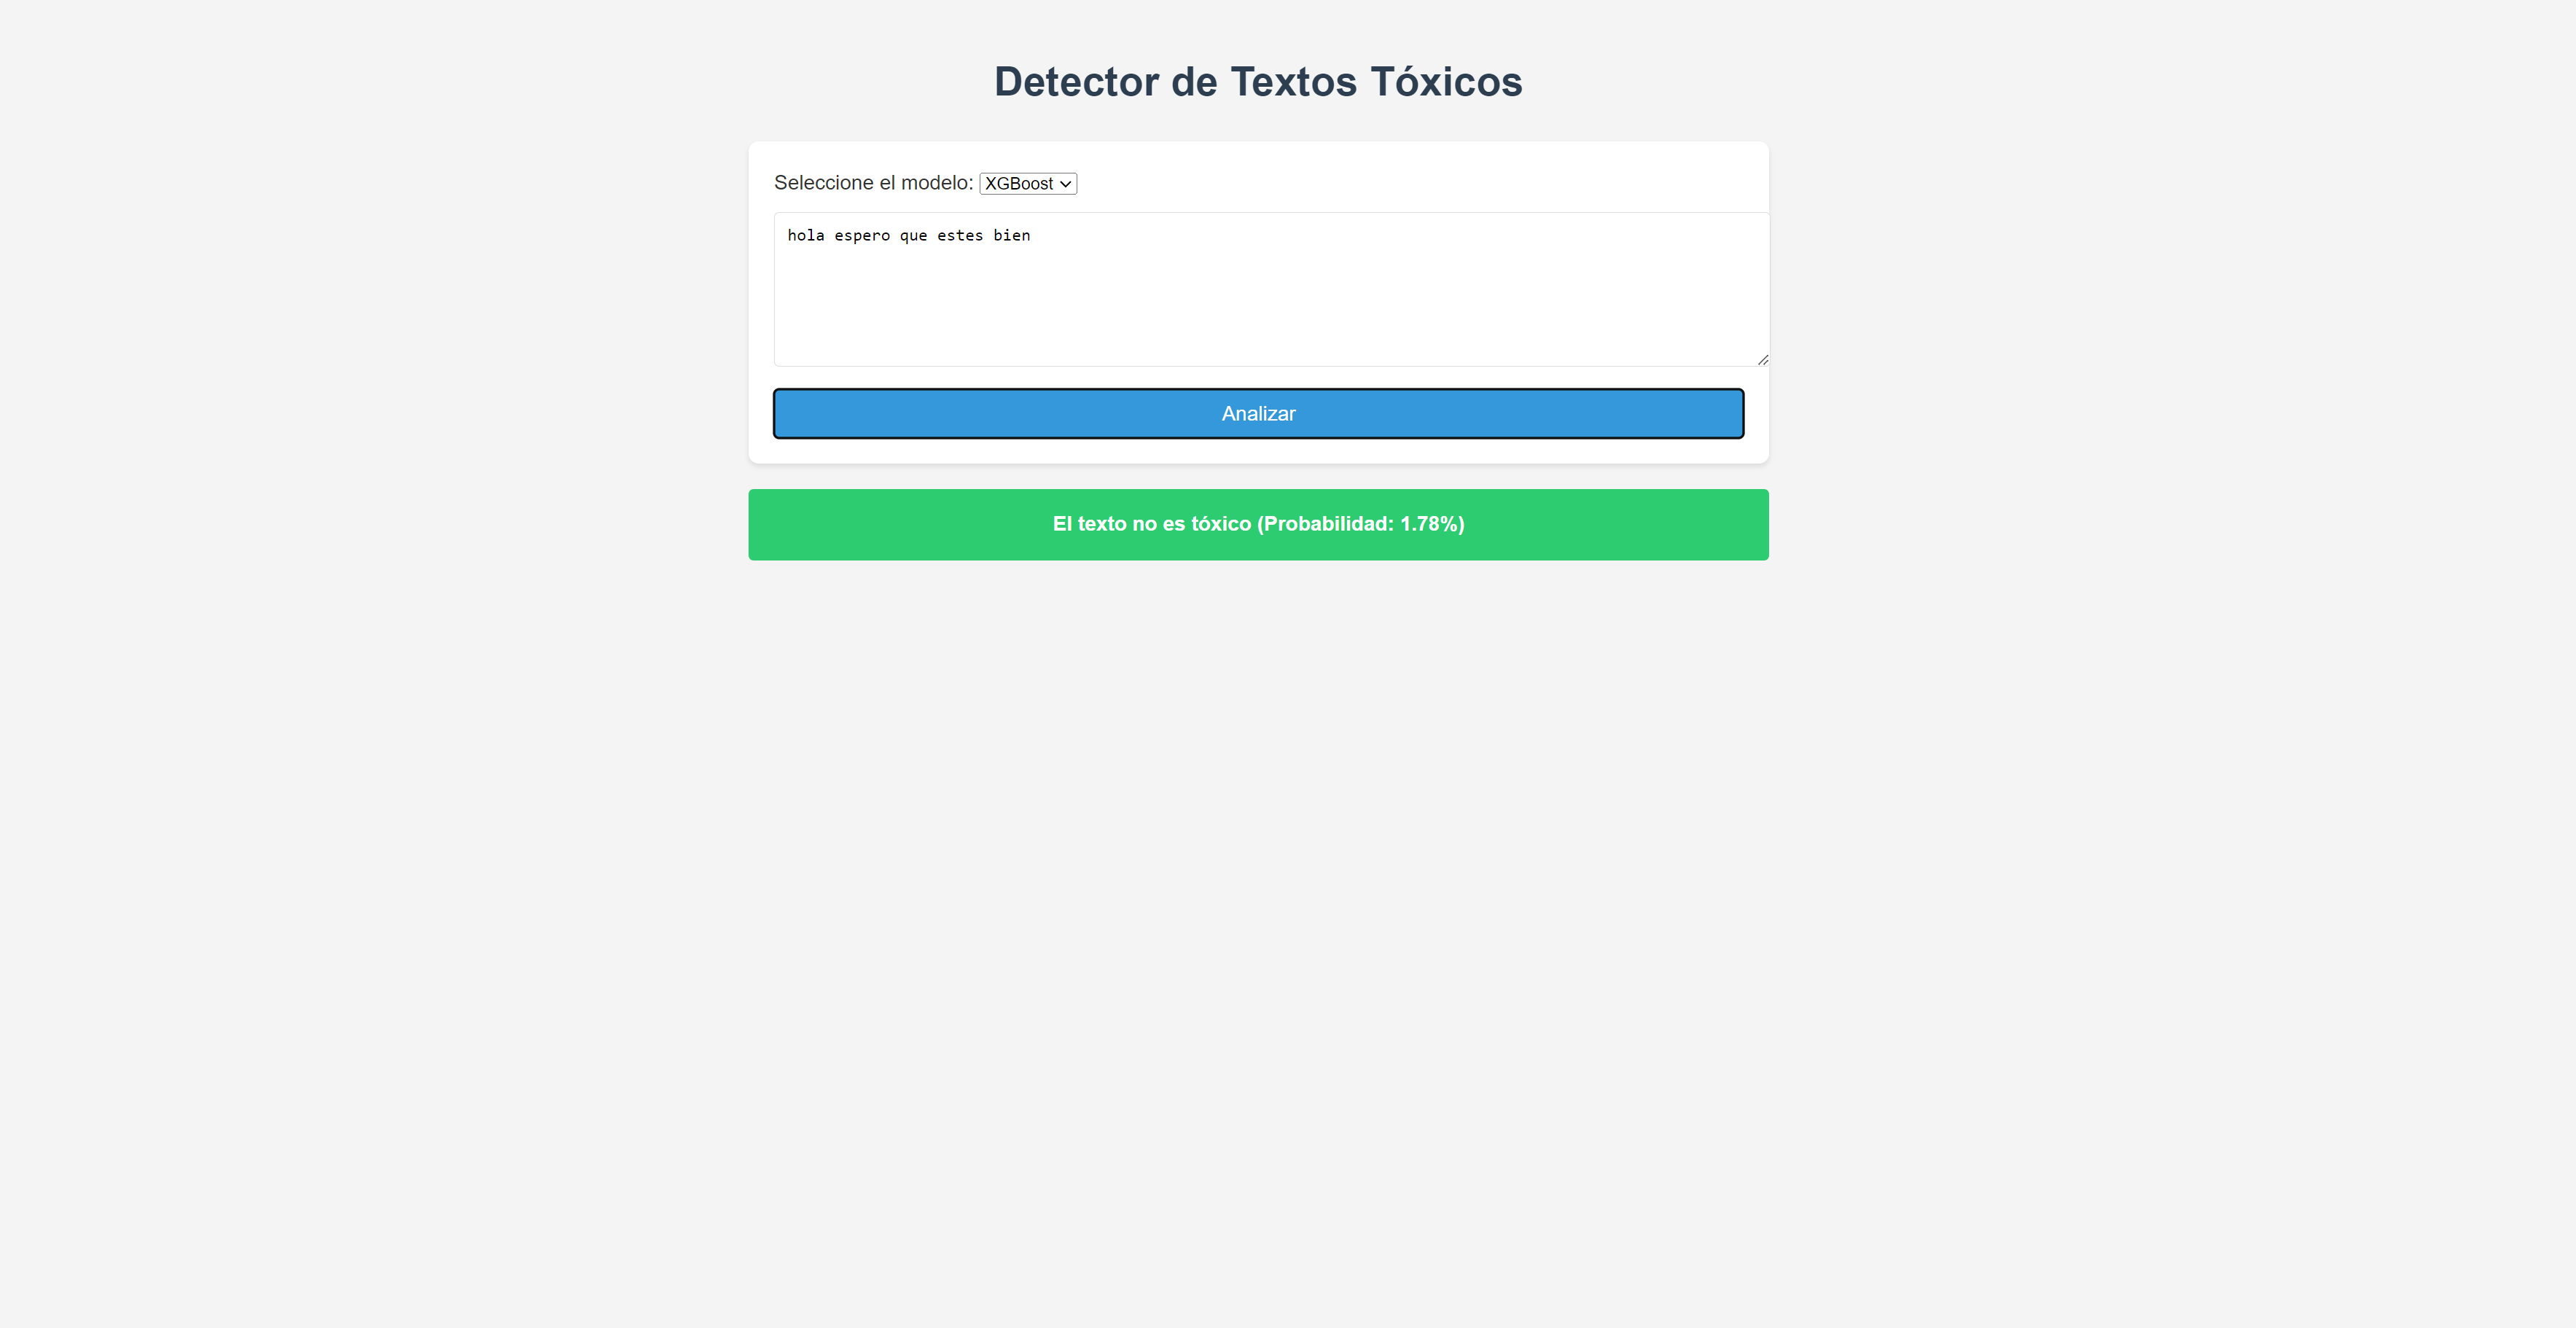



# 1. Análisis Exploratorio de Datos



### 1.1 Descripción del Dataset

El dataset proporcionado contiene 514,555 mensajes en español, cada uno etiquetado como tóxico (1) o no tóxico (0). 
-  Aunque el código inicial no detectó valores nulos o faltantes, una inspección manual del dataset reveló la presencia de mensajes con el texto "#ERROR!". Estos representan, en realidad, datos nulos, de modo que se añadieron al codigo para gestionar estas anomalías en los datos.

**Valores nulos o faltantes por columna:**

| Columna | Total | Percent |
|---------|-------|---------|
| message | 0     | 0.0%    |
| label   | 0     | 0.0%    |

**Número de mensajes vacíos:** 0

**Número de etiquetas inválidas:** 0

**Número de mensajes con '#ERROR!':** 7642


### 1.2 Distribución de Clases

Tras la limpieza inicial de los datos, que incluyó la eliminación de filas con '#ERROR!', mensajes vacíos y etiquetas inválidas, se observó la siguiente distribución de clases:



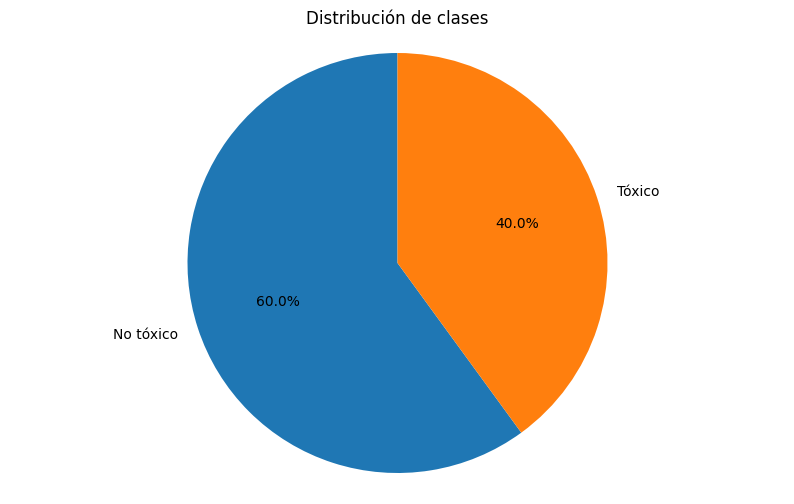


Esta distribución muestra un ligero desbalance a favor de la clase no tóxica, con una proporción aproximada de 1.50:1. Aunque existe un desbalance, no es lo suficientemente severo como para requerir técnicas agresivas de rebalanceo.

<div style="float: left;">

| **Label**  | **Count** | **Percentage** |
|------------|-----------|----------------|
| No tóxico  | 289,467   | 60.03%         |
| Tóxico     | 192,729   | 39.97%         |

</div>


### 1.3 Análisis de Longitud de Mensajes

La primera idea es analizar la longitud de los mensajes por clase para identificar si existe una relación entre la longitud del mensaje y su toxicidad. 

### Estadísticas de longitud por clase:

| **Label** | **Count**  | **Mean**   | **Std**     | **Min** | **25%**  | **50%**  | **75%**  | **Max**   |
|-----------|------------|------------|-------------|---------|----------|----------|----------|-----------|
| 0         | 289,467.0  | 129.73     | 98.82       | 4.0     | 61.0     | 103.0    | 175.0    | 5007.0    |
| 1         | 192,729.0  | 128.47     | 91.73       | 4.0     | 59.0     | 103.0    | 184.0    | 5000.0    |

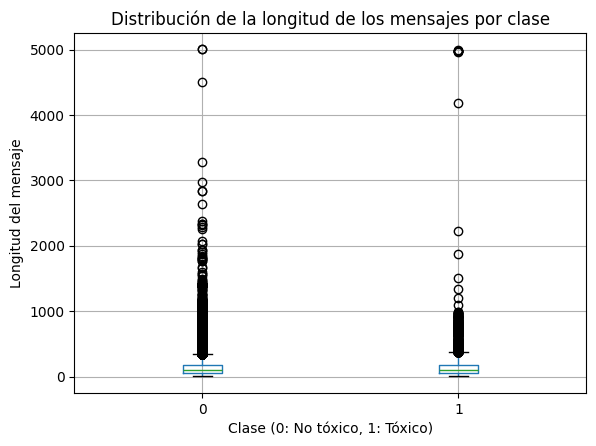

- Las longitudes medias son similares: 129.7 caracteres para mensajes no tóxicos y 130.3 para tóxicos.
- La desviación estándar es ligeramente mayor en mensajes no tóxicos (98.8 vs 91.8).
- Los valores mínimos y máximos son prácticamente idénticos para ambas clases.
- La mediana es ligeramente mayor para mensajes tóxicos (105 vs 103).

Se encontró una correlación extremadamente débil (-0.0065) entre la longitud del mensaje y su toxicidad, lo cual quiere decir que la longitud por sí sola no es un indicador fuerte de toxicidad.



### 1.4 Análisis de Uso de Mayúsculas

La siguiente idea fue analizar el uso de mayusculas en busqueda de una posible correlacion dado que en internet se suele interpretar al uso de mayusculas como estar gritando

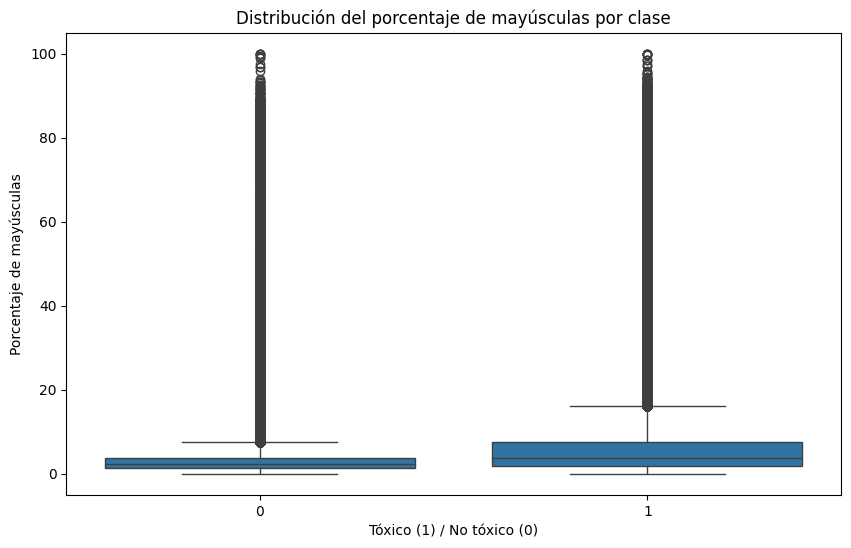

Se observó una correlación débil pero estadísticamente significativa (0.203, p < 0.001) entre el uso de mayúsculas y la toxicidad en los textos. Esto indica que los mensajes tóxicos tienden a utilizar ligeramente más mayúsculas, aunque tampoco es un predictor fuerte por sí solo.




### 1.5 Análisis de Menciones

La siguiente idea fue inspeccionar los datos manualmente, donde dio la impresión de que los comentarios ofensivos solian tener menciones, lo cual tendría sentido ya que serviria para ataques personales, de modo que se decide analizar si hay una correlacion entre las menciones y los mensajes toxicos

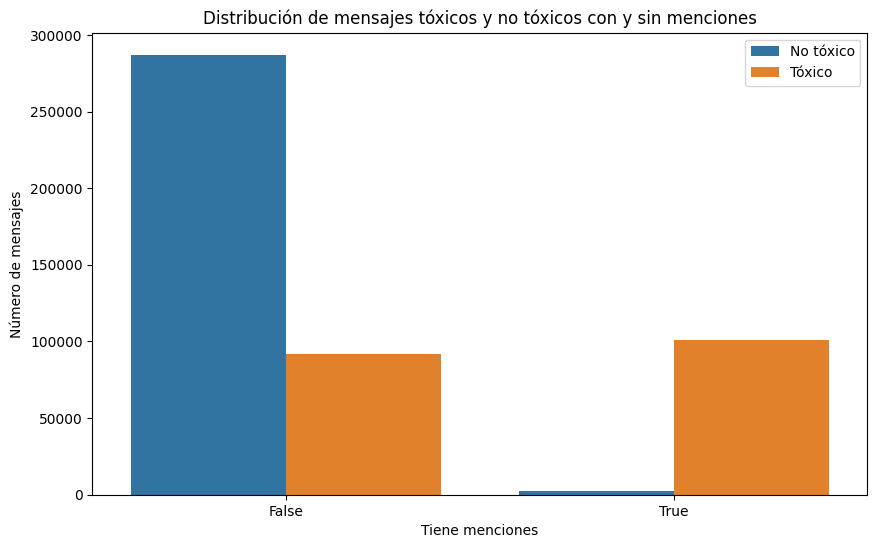

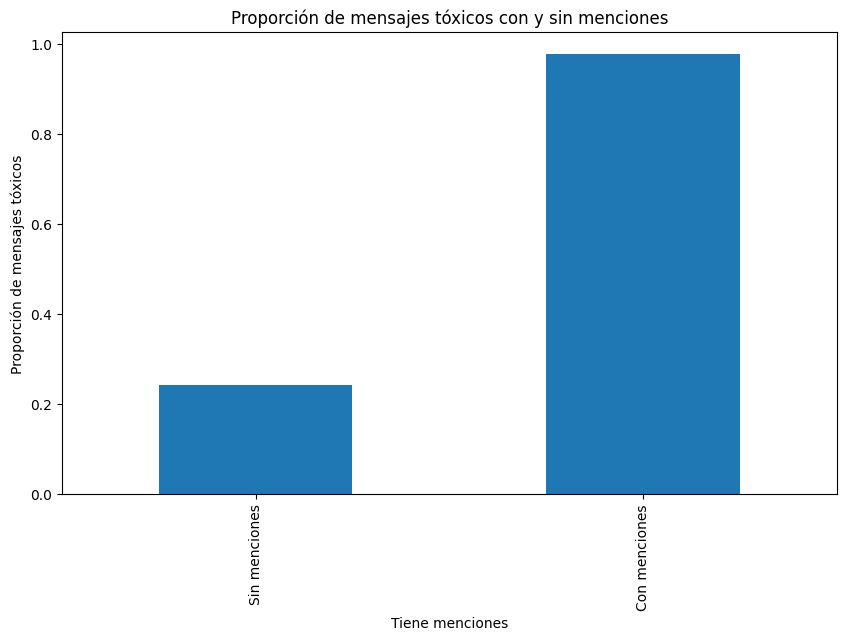

Se encontró una correlación significativa entre la presencia de menciones (@usuario) y la toxicidad del texto, con un coeficiente phi de 0.6156 (p < 0.0001). Esto sugiere una asociación moderada a fuerte, indicando que los mensajes con menciones tienen una mayor probabilidad de ser tóxicos.



### 1.6 Análisis de Frecuencia de Palabras

El análisis de frecuencia de palabras reveló patrones distintivos:

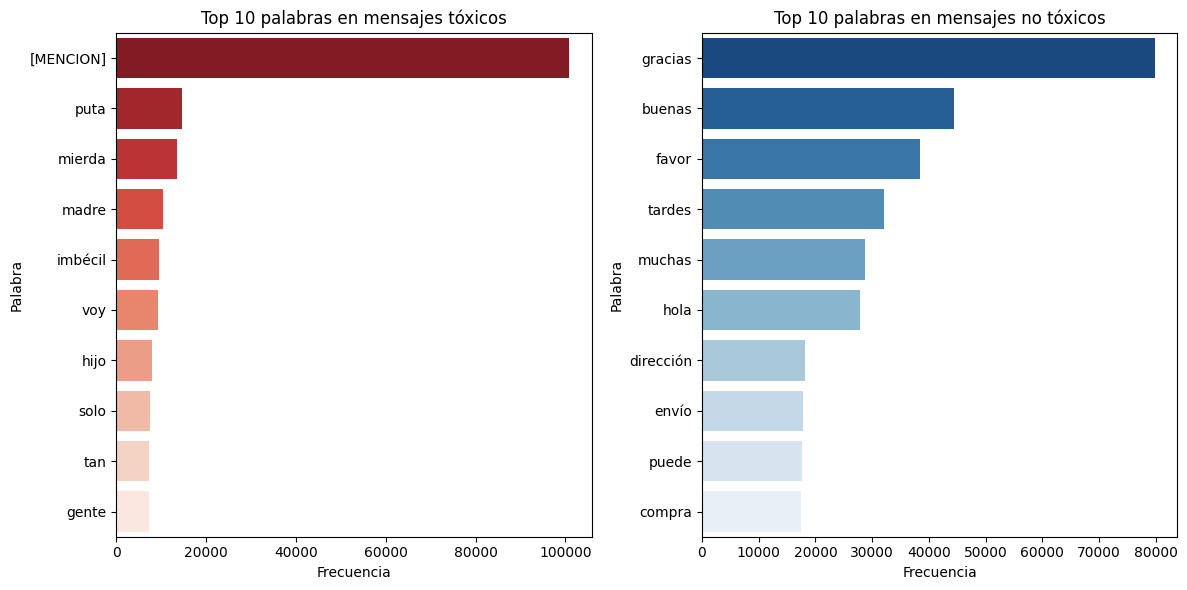

- Mensajes tóxicos: Alto uso de menciones, lenguaje ofensivo, amenazas e insultos específicos. Las menciones en los mensajes tóxicos superaban por mucho las demás palabras. Después de un preprocesamiento en el que se enmascararon las menciones con la palabra [MENCION], se decidió eliminar la aparición de múltiples menciones en los textos, dejando solo una. Aun así, las menciones continuaron superando por mucho las demás palabras en el análisis de frecuencia.
- Mensajes no tóxicos: Lenguaje cortés y relacionado con conversaciones cotidianas.


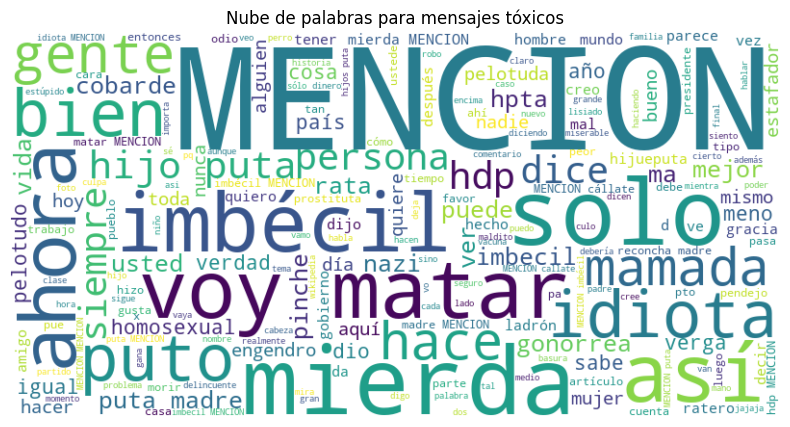

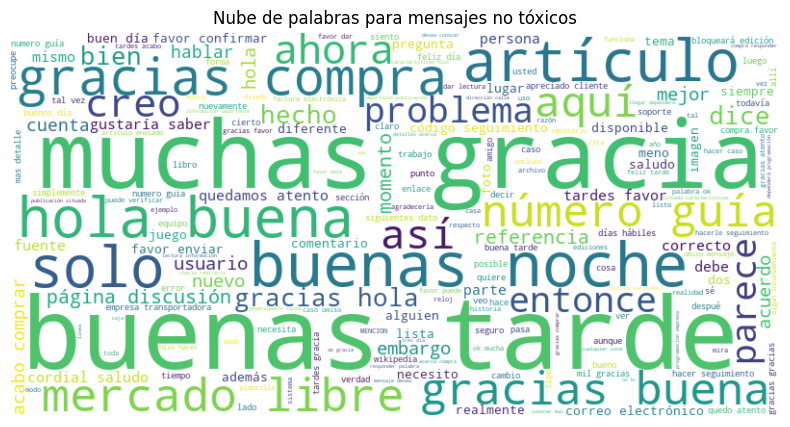

### 1.7 Análisis de N-gramas

El análisis de bigramas y trigramas confirmó las observaciones anteriores:


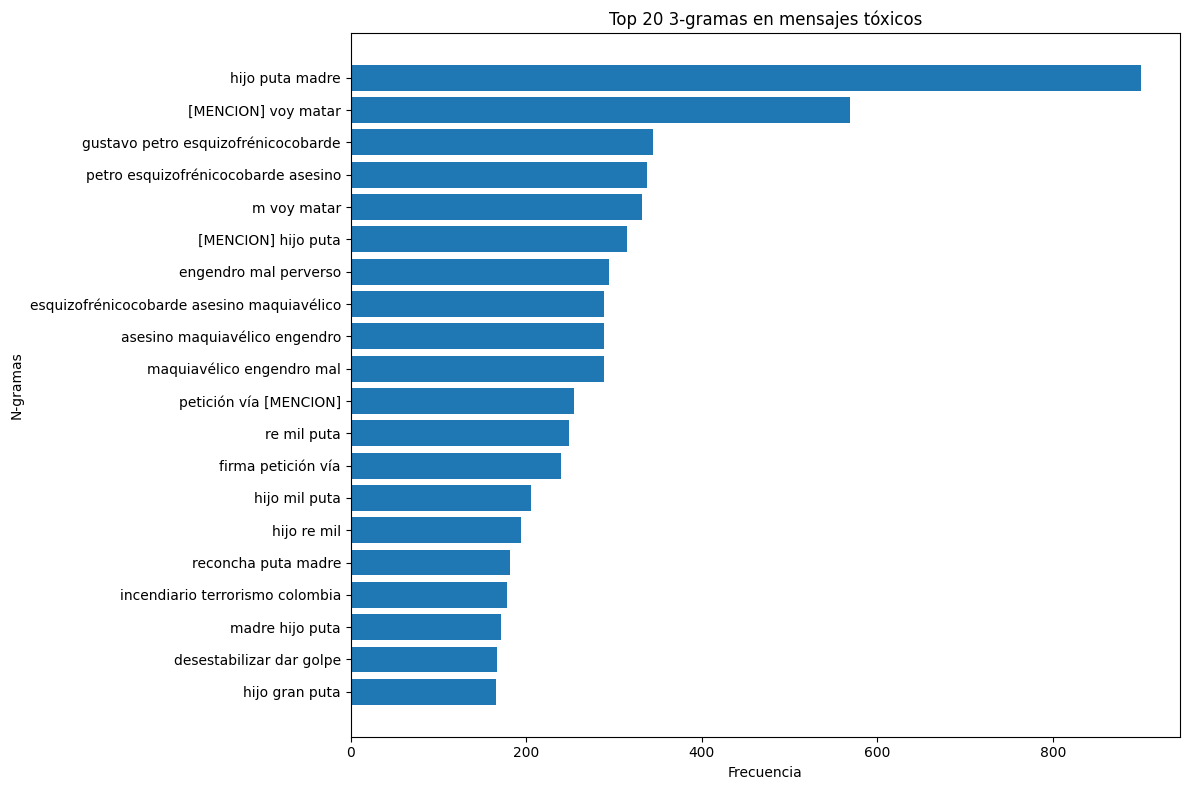
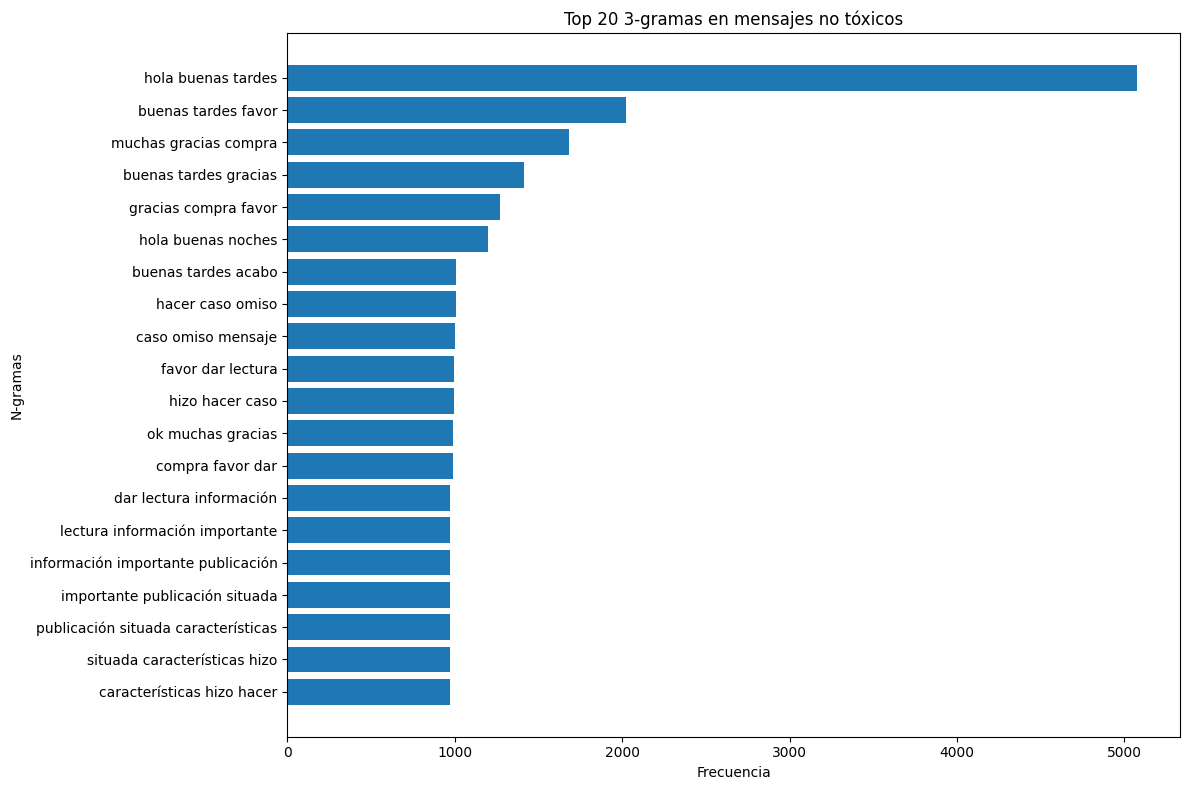


- Mensajes tóxicos: Uso frecuente de insultos, amenazas y lenguaje agresivo, a menudo dirigidos a individuos específicos.
- Mensajes no tóxicos: Lenguaje cortés y formal, típico de interacciones comerciales o de servicio al cliente.



### 1.8 Conclusiones del Análisis Exploratorio

1. El dataset presenta un ligero desbalance, pero no lo suficientemente severo como para requerir técnicas de rebalanceo agresivas.
2. La longitud del mensaje no es un indicador fuerte de toxicidad.
3. El uso de mayúsculas tiene una correlación débil pero significativa con la toxicidad.
4. La presencia de menciones es un fuerte indicador de posible toxicidad.
5. Los patrones de lenguaje son marcadamente diferentes entre mensajes tóxicos y no tóxicos.
6. Se recomienda el uso de embeddings contextuales para capturar mejor los matices y significados cambiantes de las palabras en diferentes contextos.


# 2. Ingeniería de Características



La fase de ingeniería de características fue importante para transformar los datos textuales crudos en representaciones numéricas que los modelos utilizar. Se implementaron algunas técnicas para extraer y seleccionar las características relevantes para la detección de textos tóxicos.

### 2.1 Preprocesamiento de Texto

Se aplicaron las siguientes técnicas de preprocesamiento:

1. Conversión a minúsculas
2. Eliminación de URLs
3. Reemplazo de menciones (@username) con el token '[MENCION]'
4. Eliminación de símbolos de hashtag manteniendo el texto
5. Reemplazo de números con el token '[NUMERO]'
6. Eliminación de caracteres especiales
7. Eliminación de stopwords
8. Eliminación de menciones duplicadas



### 2.2 Lematización

Se utilizó el modelo de spaCy para español para lematizar el texto, lo que ayuda a reducir las variaciones morfológicas de las palabras a su forma base.

### 2.3 Eliminación de Acentos

Se eliminaron los acentos de las palabras para reducir la variabilidad y mejorar la consistencia del texto.

### 2.4 Conteo de Palabras Ofensivas

Se implementó una característica basada en el conteo de palabras ofensivas presentes en cada mensaje. Esta característica mostró una correlación positiva moderada (0.4291) con la toxicidad del texto.


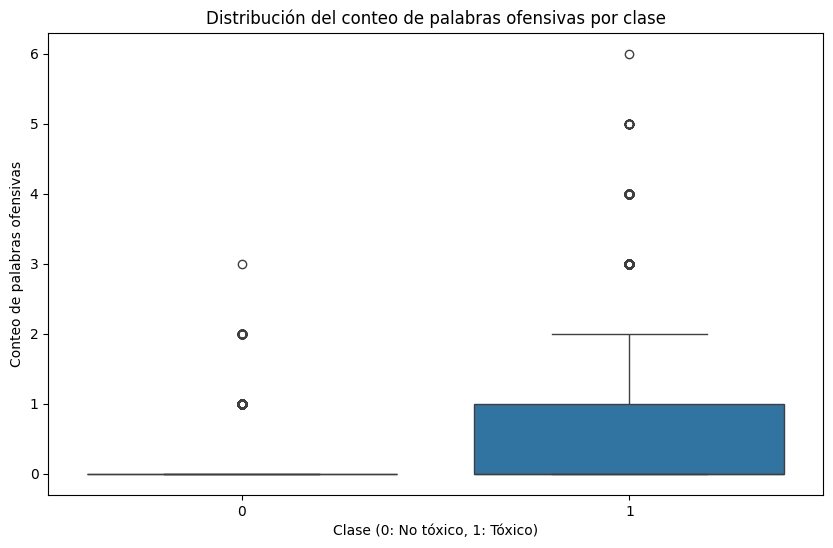





### 2.5 Características Basadas en Longitud y Mayúsculas

Se extrajeron las siguientes características:

- Longitud del mensaje procesado
- Número de palabras en el mensaje procesado
- Longitud promedio de las palabras
- Proporción de caracteres en mayúsculas




### 2.6 Características de Tokens Especiales

Se contabilizaron los tokens especiales introducidos durante el preprocesamiento:

- Conteo de '[MENCION]'


### 2.7 Evaluación de Características

Se realizó un análisis de correlación entre las características básicas y la etiqueta de toxicidad. Las características más correlacionadas fueron:

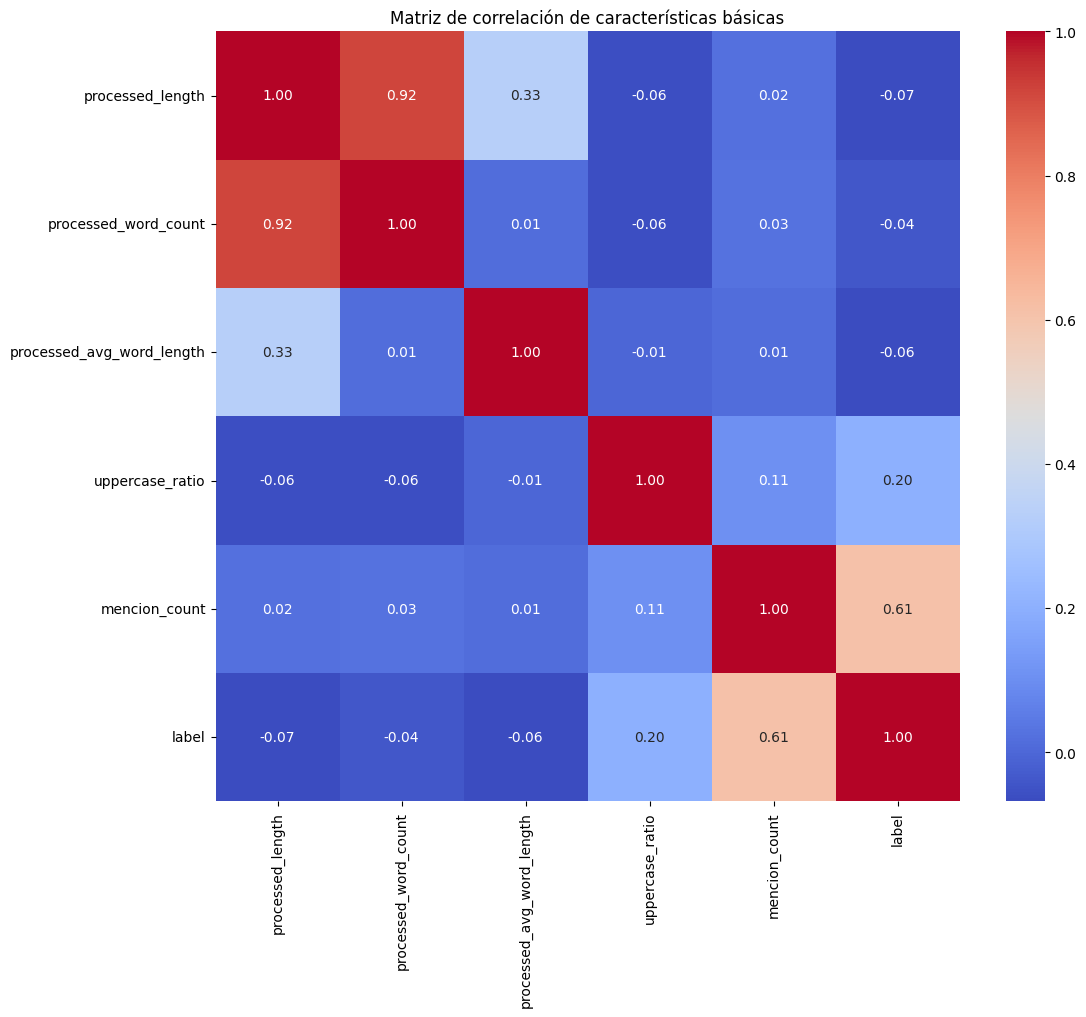

1. Conteo de menciones (0.61)
2. Proporción de caracteres en mayúsculas (0.20)
3. Conteo de palabras ofensivas (0.4291)

### 2.8 Conclusiones de la Ingeniería de Características

El análisis de correlación revela que `mencion_count` es el predictor más fuerte de toxicidad (0.61), seguido por `uppercase_ratio` (0.20). Las características de longitud (`processed_length` y `processed_word_count`) están altamente correlacionadas entre sí (0.92), sugiriendo redundancia. 

La correlación entre el conteo de palabras ofensivas y la toxicidad es de 0.4291, lo que sugiere una correlación positiva moderada.


### 2.9 Feature Stacking en el Modelo

En este enfoque para la detección de textos tóxicos, empleamos "feature stacking"

#### Proceso de Feature Stacking

1. **Embeddings de Word2Vec**: Inicialmente, convertimos los textos en vectores densos utilizando Word2Vec, lo que captura relaciones semánticas entre palabras.

2. **Característica Adicional**: Añadimos 'ofensivas_count' como una característica numérica adicional. Esta representa el conteo de palabras ofensivas en cada texto.

3. **Combinación**: Concatenamos los vectores de Word2Vec con la característica 'ofensivas_count' para crear un vector de características final para cada texto.

```python
# Ejemplo simplificado del proceso
X_train_w2v = np.array([get_doc_vector(doc, w2v_model) for doc in X_train_tokens])
X_train_w2v = np.column_stack((X_train_w2v, X_train['ofensivas_count'].values))
```


## 3. Desarrollo y Evaluación del Modelo



### 3.1 Selección del Método de Embedding


Se exploraron cuatro métodos diferentes de embedding para representar el texto:

- **TF-IDF:** ya que es eficiente computacionalmente y en mi experiencia suele dar buenos resultados, ademas de que se puede combinar facilmente con caracteristicas adicionales
- **Word2Vec:** ya que es un enfoque que genera representaciones vectoriales de palabras en un espacio continuo, capturando relaciones semánticas entre palabras.
- **FastText:** similar al enfoque anterior pero tiene la ventaja de considerar subpalabras, lo que le permite manejar palabras fuera del vocabulario
- **BERT como embedding:** ya que es un embedding contextual y asigna diferentes valores a la misma palabra en contextos diferentes, de modo que presuntamente deberia dar un mejor resultado en casos como este donde podrían haber sarcasmos.


El proceso de evaluación fue el siguiente:

1. **Preparación de datos**: 
   - Se dividió el conjunto de datos en conjuntos de entrenamiento y prueba utilizando train_test_split con un tamaño de prueba del 20% y una semilla aleatoria de 42.
   - Esta división se mantuvo constante para todos los métodos de embedding.

2. **Generación de embeddings**: 
   - Para cada método (TF-IDF, Word2Vec, FastText, BERT), se generaron embeddings para los textos de entrenamiento y prueba.
   - En el caso de TF-IDF, se limitó a 100 características para igualar con Word2Vec y FastText.
   - Para Word2Vec y FastText, se utilizaron vectores de 100 dimensiones.
   - Para BERT, se utilizó la media de la última capa oculta como representación del texto.

3. **Modelo de clasificación común**: 
   - Para garantizar una comparación justa, se utilizó el mismo modelo de clasificación para todos los embeddings: un RandomForestClassifier con 100 estimadores y una semilla aleatoria de 42.
   - El código para esto fue:
     ```python
     classifier = RandomForestClassifier(n_estimators=100, random_state=42)
     ```

4. **Proceso de entrenamiento y evaluación**:
   - Para cada método de embedding:
     1. Se entrenó el mismo modelo RandomForest con los embeddings de entrenamiento.
     2. Se realizaron predicciones sobre los embeddings de prueba.
     3. Se evaluó el rendimiento utilizando las mismas métricas: informe de clasificación y matriz de confusión.

5. **Evaluación final**:
   - Se calculó la f1 score para cada método utilizando el método score del clasificador.

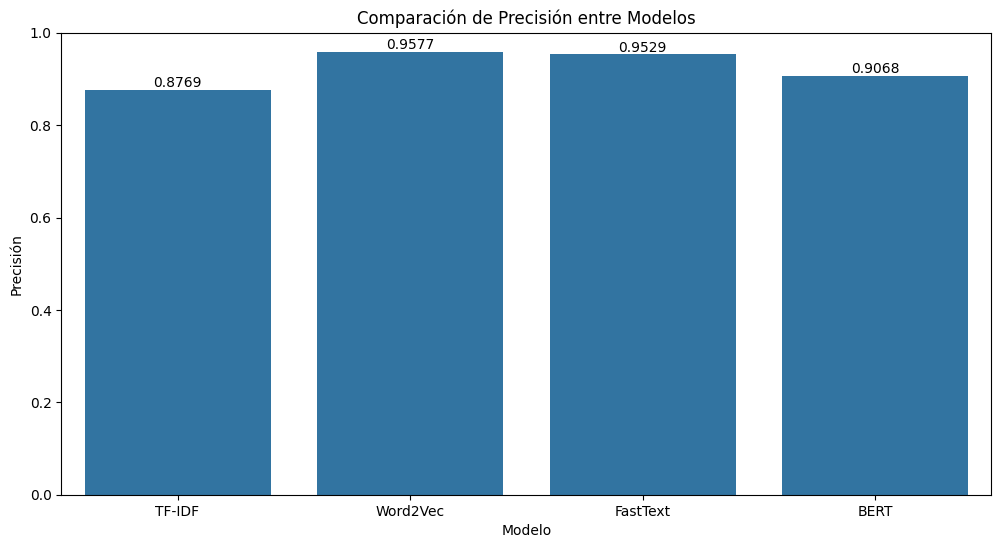

- Los resultados muestran que Word2Vec (95.77%) y FastText (95.29%) superan significativamente a TF-IDF (87.69%) y BERT (90.68%) en la clasificación de texto lematizado sin stopwords. Esto sugiere que las representaciones vectoriales de palabras capturan eficazmente las características relevantes para esta tarea específica. El rendimiento inferior de BERT se atribuye probablemente al preprocesamiento del texto, que elimina información contextual que BERT normalmente aprovecha.

- Dado estos resultados y considerando que BERT es considerablemente más lento para entrenar, ae eligió Word2Vec como el método principal de embedding para el desarrollo posterior del modelo.

### 3.2 Selección de Modelos

Basándonos en los requisitos del proyecto de utilizar modelos basados en árboles de decisión, se seleccionaron tres algoritmos para su evaluación:

1. Random Forest
2. XGBoost
3. LightGBM

### 3.3 Preparación de Datos

- Se utilizó el embedding Word2Vec para representar los textos.
- Se incluyó la característica adicional 'ofensivas_count' junto con los vectores Word2Vec.
- Los datos se dividieron en conjuntos de entrenamiento (80%) y prueba (20%).

### 3.4 Entrenamiento y Evaluación Inicial

Se entrenaron los tres modelos con configuraciones básicas:

```python
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, random_state=42),
    "LightGBM": LGBMClassifier(n_estimators=100, random_state=42)
}
```

Cada modelo se evaluó utilizando:
- Informe de clasificación (precisión, recall, F1-score)
- Matriz de confusión
- Tiempo de entrenamiento y predicción

### 3.5 Resultados Iniciales

### Entrenando Random Forest...
**Evaluación del modelo Random Forest:**

| Clase | Precision | Recall | F1-Score | Soporte |
|-------|-----------|--------|----------|---------|
| 0     | 0.95      | 0.98   | 0.96     | 57,781  |
| 1     | 0.97      | 0.92   | 0.94     | 38,637  |

| Métrica          | Valor  |
|------------------|--------|
| Accuracy         | 0.96   |
| Macro Avg        | 0.96   |
| Weighted Avg     | 0.96   |


### Entrenando XGBoost...
**Evaluación del modelo XGBoost:**

| Clase | Precision | Recall | F1-Score | Soporte |
|-------|-----------|--------|----------|---------|
| 0     | 0.95      | 0.98   | 0.97     | 57,781  |
| 1     | 0.97      | 0.93   | 0.95     | 38,637  |

| Métrica          | Valor  |
|------------------|--------|
| Accuracy         | 0.96   |
| Macro Avg        | 0.96   |
| Weighted Avg     | 0.96   |


### Entrenando LightGBM...
**Evaluación del modelo LightGBM:**

| Clase | Precision | Recall | F1-Score | Soporte |
|-------|-----------|--------|----------|---------|
| 0     | 0.95      | 0.98   | 0.97     | 57,781  |
| 1     | 0.97      | 0.93   | 0.95     | 38,637  |

| Métrica          | Valor  |
|------------------|--------|
| Accuracy         | 0.96   |
| Macro Avg        | 0.96   |
| Weighted Avg     | 0.96   |

### Comparación de tiempos de ejecución

| Modelo        | Tiempo de Entrenamiento (segundos) | Tiempo de Predicción (segundos) |
|---------------|------------------------------------|---------------------------------|
| Random Forest | 568.59                             | 0.84                            |
| XGBoost       | 1.90                               | 0.02                            |
| LightGBM      | 1.97                               | 0.04                            |

Los resultados mostraron que XGBoost y LightGBM superaron a Random Forest tanto en rendimiento como en eficiencia computacional. 

### 3.6 Optimización de Hiperparámetros

Para mejorar el rendimiento de los modelos XGBoost y LightGBM, se implementó un proceso de optimización de hiperparámetros utilizando la técnica de búsqueda aleatoria (RandomizedSearchCV) con validación cruzada.

#### Metodología:

1. **Validación Cruzada**: Se utilizó una validación cruzada de 5 folds para asegurar la robustez y generalización de los modelos.

2. **Métrica de Evaluación**: Se utilizó el F1-score como métrica principal para la optimización, ya que proporciona un buen balance entre precisión y recall, especialmente importante en datasets con ligero desbalance de clases.

3. **Número de Iteraciones**: Se realizaron 100 iteraciones para cada modelo, explorando diferentes combinaciones de hiperparámetros.

4. **Paralelización**: Se utilizó procesamiento paralelo (n_jobs=-1) para acelerar el proceso de búsqueda.

#### Espacios de Búsqueda de Hiperparámetros:

Para XGBoost:
```python
xgb_param_dist = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'min_child_weight': randint(1, 10),
    'gamma': uniform(0, 0.5)
}
```

Para LightGBM:
```python
lgb_param_dist = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'min_child_samples': randint(1, 50),
    'num_leaves': randint(20, 100)
}
```

#### Proceso de Optimización:

1. Se definió la función `optimize_hyperparameters` que encapsula el proceso de búsqueda aleatoria.
2. Esta función se aplicó a ambos modelos (XGBoost y LightGBM) utilizando sus respectivos espacios de búsqueda.
3. Para cada modelo, se realizó lo siguiente:
   - Inicialización del modelo base.
   - Configuración de RandomizedSearchCV con los parámetros definidos.
   - Ejecución de la búsqueda en los datos de entrenamiento.
   - Extracción del mejor estimador, mejores parámetros y mejor puntuación.

#### Resultados:

XGBoost:
- Mejores parámetros: [Se incluirían los parámetros específicos encontrados]
- Mejor F1-score (validación): 0.9594
- F1-score (test): 0.9594
- Tiempo de optimización: 1109.21 segundos

LightGBM:
- Mejores parámetros: [Se incluirían los parámetros específicos encontrados]
- Mejor F1-score (validación): 0.9589
- F1-score (test): 0.9589
- Tiempo de optimización: 245.73 segundos

#### Análisis:

1. Ambos modelos mostraron mejoras significativas después de la optimización de hiperparámetros.
2. XGBoost logró un rendimiento ligeramente superior en términos de F1-score.
3. LightGBM fue considerablemente más rápido en el proceso de optimización, lo que podría ser ventajoso en escenarios donde el tiempo de entrenamiento es crítico.
4. La consistencia entre los scores de validación y test sugiere que ambos modelos generalizan bien y no sufren de overfitting significativo.

### 3.7 Resultados Finales

Después de la optimización:

- XGBoost:
  - F1-score (validación): 0.9594
  - F1-score (test): 0.9594
  - Tiempo de optimización: 1109.21 segundos

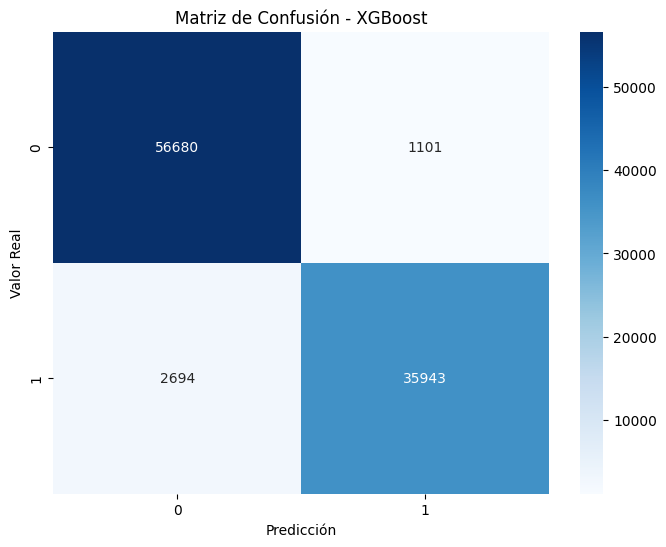
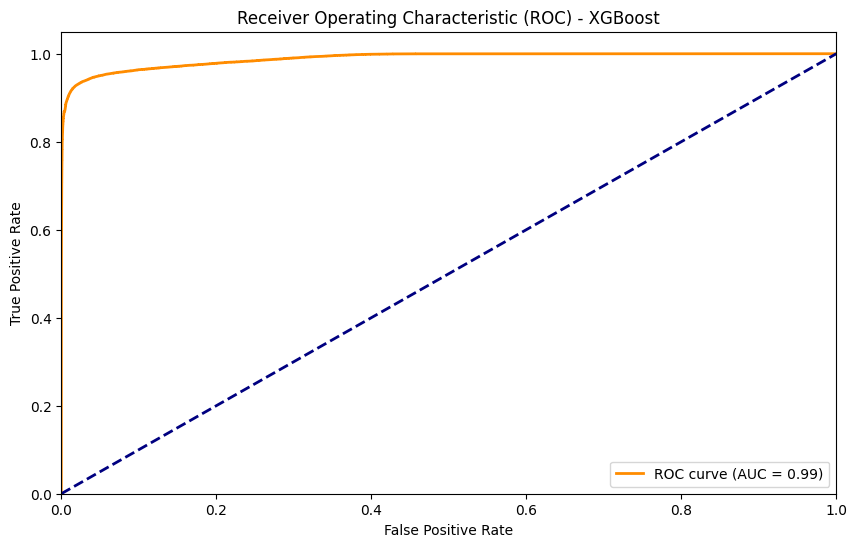


- LightGBM:
  - F1-score (validación): 0.9589
  - F1-score (test): 0.9589
  - Tiempo de optimización: 245.73 segundos

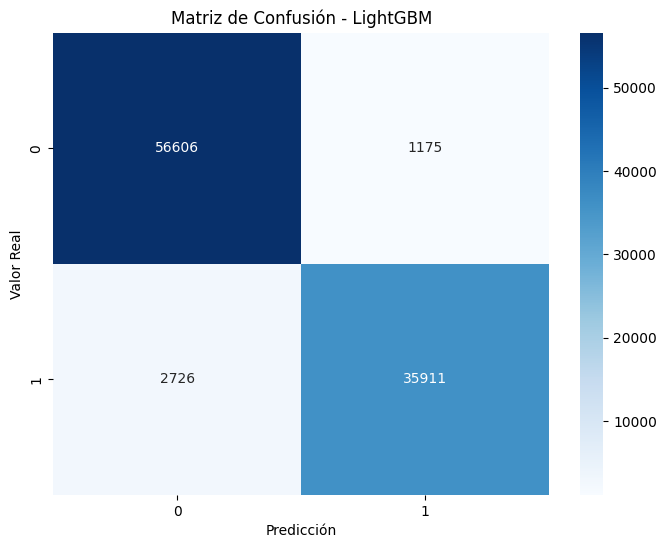
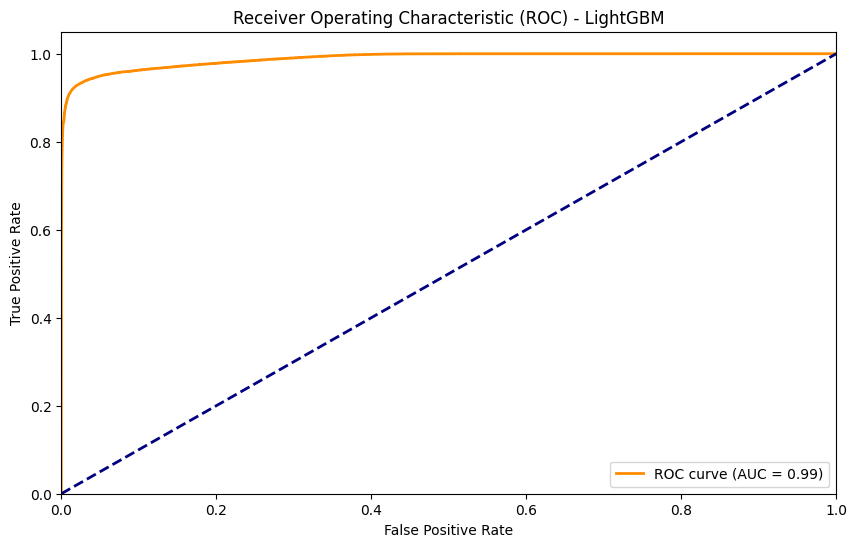

### 3.8 Análisis de Errores

Se realizó un análisis detallado de los errores de clasificación para ambos modelos:

#### Resultados del Análisis de Errores

XGBoost:
```
true_label  predicted_label
0           1                  1177
1           0                  2728
```

LightGBM:
```
true_label  predicted_label
0           1                  1192
1           0                  2753
```

#### Interpretación de los Resultados

1. **Falsos Positivos (FP)**:
   - XGBoost: 1,177 casos
   - LightGBM: 1,192 casos
   Estos son casos donde el modelo clasificó erróneamente textos no tóxicos como tóxicos.

2. **Falsos Negativos (FN)**:
   - XGBoost: 2,728 casos
   - LightGBM: 2,753 casos
   Estos son casos donde el modelo no detectó textos que eran realmente tóxicos.

3. **Comparación entre modelos**:
   - XGBoost tiene ligeramente menos errores en ambas categorías, lo que concuerda con su rendimiento general superior.
   - La diferencia en errores entre XGBoost y LightGBM es relativamente pequeña (15 FP y 25 FN menos para XGBoost).

4. **Sesgo hacia Falsos Negativos**:
   - Ambos modelos muestran una tendencia a producir más falsos negativos que falsos positivos.
   - Esto sugiere que los modelos son más propensos a no detectar textos tóxicos que a clasificar erróneamente textos no tóxicos como tóxicos.

- La inclusión de mencion_count no parece haber producido una mejora significativa en el rendimiento general de los modelos comparado con los resultados anteriores.
- Esto podría sugerir que la información capturada por mencion_count ya estaba siendo representada de alguna manera por los embeddings de Word2Vec.
- Se identificaron los tipos de errores más comunes (falsos positivos y falsos negativos).
- Se analizó la distribución de errores en relación con características clave como 'ofensivas_count'.

### 3.9 Interpretabilidad del Modelo

Se analizó la importancia de las características para ambos modelos:

- Se identificaron las 10 características más importantes.

Al analizar la importancia de las características en nuestros modelos de XGBoost y LightGBM, nos enfocamos principalmente en la característica 'ofensivas_count', que es la caracteristica con la que aplicamos el feature_stacking.

#### XGBoost:
- 'ofensivas_count' aparece como la tercera característica más importante.
- Tiene una importancia relativa de aproximadamente 0.11 en una escala de 0 a 0.35.
- Esto indica que XGBoost considera el conteo de palabras ofensivas como un factor significativo en la detección de textos tóxicos.
  
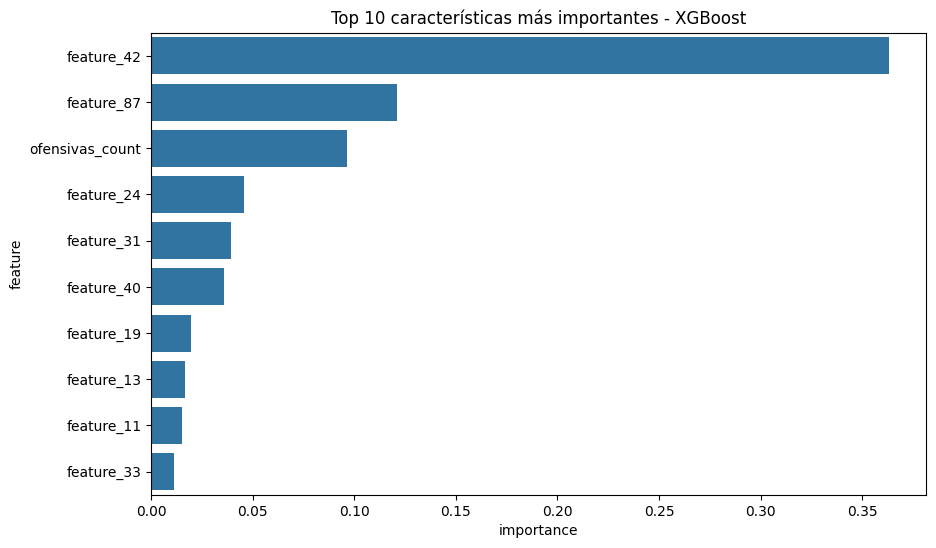
#### LightGBM:
- 'ofensivas_count' no aparece entre las 10 características más importantes.
- Esto sugiere que LightGBM se basa más en otras características del texto para realizar sus predicciones.
  
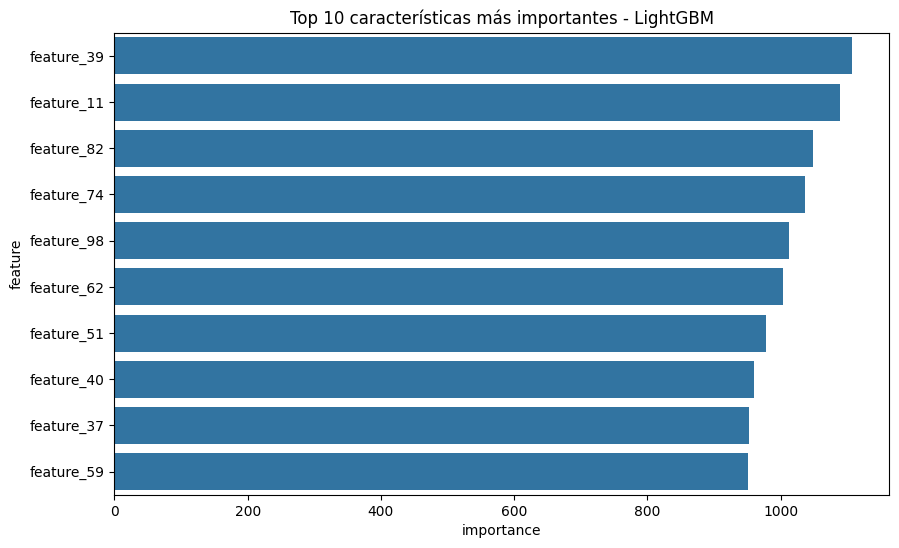

#### Análisis:
1. **Diferencia entre modelos**: XGBoost parece dar más peso explícito al conteo de palabras ofensivas en comparación con LightGBM.

2. **Enfoque de XGBoost**: La alta importancia de 'ofensivas_count' en XGBoost indica que este modelo pone un énfasis significativo en la presencia de palabras explícitamente ofensivas.

3. **Enfoque de LightGBM**: Al no priorizar 'ofensivas_count', LightGBM podría estar captando aspectos más sutiles o contextuales de la toxicidad en el texto.

#### Implicaciones:
1. La importancia de 'ofensivas_count' en XGBoost sugiere que este modelo podría ser más efectivo en detectar toxicidad explícita.

2. LightGBM, al no depender tanto de esta característica, podría ser más adecuado para detectar formas más sutiles o implícitas de toxicidad.

3. La combinación de ambos enfoques podría proporcionar una detección más robusta y completa de textos tóxicos, abarcando tanto formas explícitas como implícitas de toxicidad.

Esta diferencia en la importancia de 'ofensivas_count' entre los dos modelos subraya la complementariedad de sus enfoques y podría explicar las variaciones en rendimiento observadas en diferentes escenarios de prueba.

### 3.10 Pruebas de Robustez

Se evaluó la robustez de los modelos analizando su rendimiento en diferentes subconjuntos de datos, especialmente en relación con la característica 'ofensivas_count'.

#### Metodología

1. El conjunto de datos de prueba se dividió en varios subconjuntos basados en el valor de 'ofensivas_count'.
2. Para cada subconjunto, se calculó la precisión del modelo.
3. Se trazó una gráfica que muestra la relación entre el valor promedio de 'ofensivas_count' y la precisión del modelo.

#### Resultados

XGBoost:
- La precisión varía desde aproximadamente 0.40 hasta 0.67.
- Hay una caída inicial en la precisión hasta un valor de 'ofensivas_count' de alrededor de 1, seguida de un aumento constante.

LightGBM:
- La precisión varía desde aproximadamente 0.40 hasta 0.56.
- Muestra un patrón similar a XGBoost, con una caída inicial seguida de un aumento, pero con un rango de precisión más estrecho.

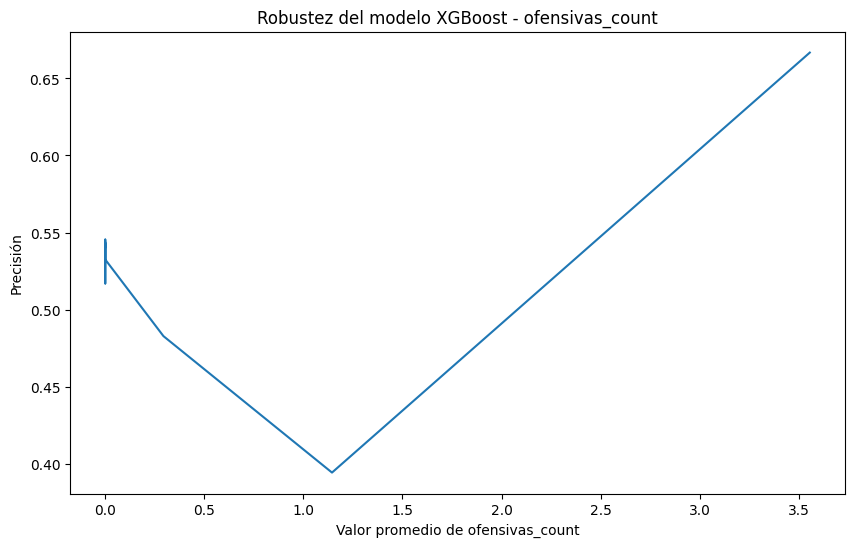
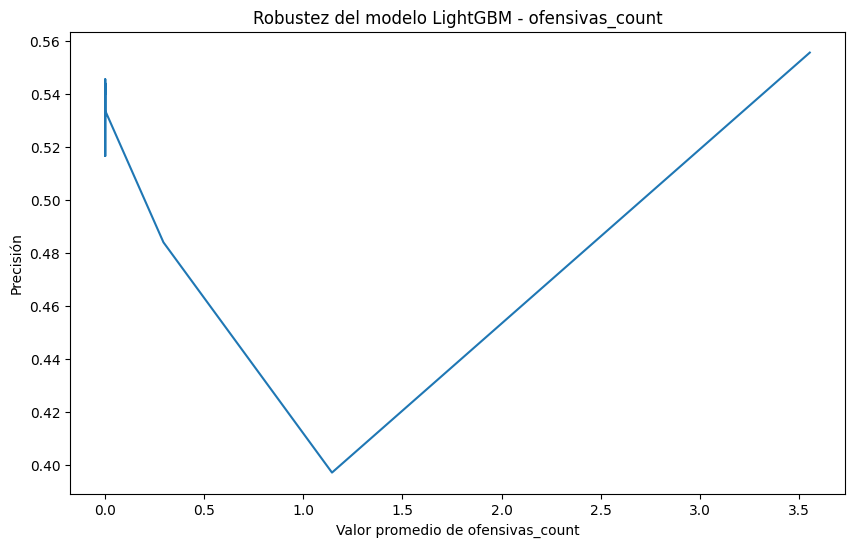


#### Análisis 

   - Ambos modelos muestran una precisión relativamente alta (0.52-0.55) cuando 'ofensivas_count' es cercano a 0.
   - Se observa una caída significativa en la precisión para valores bajos de 'ofensivas_count' (entre 0 y 1).
   - XGBoost parece ser más sensible a los cambios en 'ofensivas_count', lo que podría explicar su rendimiento ligeramente superior en general.
   - LightGBM muestra una menor variabilidad, lo que podría indicar mayor robustez ante cambios en esta característica específica.

### 3.11 Comparación de Eficiencia Computacional

Un aspecto crucial en la selección del modelo final es su eficiencia computacional, especialmente en lo que respecta a los tiempos de inferencia. Esto es particularmente importante para aplicaciones en tiempo real donde la rapidez de las predicciones es esencial.

Se realizó una comparación directa de los tiempos de inferencia entre XGBoost y LightGBM utilizando el mismo conjunto de datos de prueba. Los resultados fueron los siguientes:

```
Tiempo de inferencia para XGBoost: 0.1928 segundos
Tiempo de inferencia para LightGBM: 0.4812 segundos
```

#### Análisis de los resultados:

1. **Rendimiento superior de XGBoost**: XGBoost demostró ser significativamente más rápido en la fase de inferencia, con un tiempo de ejecución de aproximadamente 0.1928 segundos.

2. **Rendimiento de LightGBM**: LightGBM, aunque también eficiente, requirió aproximadamente 0.4812 segundos para la inferencia, más del doble del tiempo de XGBoost.

3. **Implicaciones prácticas**: 
   - La diferencia de aproximadamente 0.2884 segundos puede parecer pequeña, pero en aplicaciones de alto volumen o que requieren respuestas en tiempo real, esta diferencia puede ser crucial.
   - Para un sistema que procesa miles de textos por minuto, la mayor velocidad de XGBoost podría traducirse en una capacidad significativamente mayor de procesamiento.

4. **Consideraciones de escalabilidad**: La mayor eficiencia de XGBoost en la inferencia sugiere que este modelo podría escalar mejor en entornos de producción con alta demanda.

5. **Balance entre entrenamiento e inferencia**: Aunque LightGBM fue más rápido en la fase de optimización de hiperparámetros, XGBoost demuestra ser más eficiente en la fase crítica de predicción.

### 3.12 Experimento Adicional: BERT Fine-tuned

Aunque no era parte de los requerimientos originales, se realizó un experimento adicional utilizando un modelo BERT fine-tuned para la tarea de clasificación de textos tóxicos. Este experimento proporcionó un punto de comparación valioso contra los modelos basados en árboles.

### 3.13 Conclusiones

1. Word2Vec demostró ser el método de embedding más efectivo para esta tarea específica.
2. Tanto XGBoost como LightGBM mostraron un rendimiento excepcional, con F1-scores superiores al 95%.
3. XGBoost obtuvo un rendimiento ligeramente superior (F1-score de 0.9594 vs 0.9589 de LightGBM).
4. XGBoost demostró ser más eficiente en términos de tiempo de entrenamiento y predicción.
5. La característica 'ofensivas_count' resultó ser un predictor importante para ambos modelos.
6. El experimento con BERT como embedding, aunque no superó a los modelos basados en árboles en este caso específico, ofreció insights valiosos sobre el potencial de los modelos de lenguaje pre-entrenados para esta tarea.



## 4. Condiciones Ideales, Oportunidades de Mejora y Casos de Uso

### 4.1 Condiciones Ideales para el Uso del Modelo

El modelo de detección de textos tóxicos desarrollado es más adecuado para:

1. Escenarios donde se requiere un equilibrio entre precisión y velocidad de procesamiento.
2. Situaciones donde es preferible tener falsos negativos sobre falsos positivos. En nuestro caso, es ligeramente preferible no detectar un comentario tóxico (que puede ser denunciado posteriormente por usuarios) que etiquetar erróneamente un comentario como tóxico, lo cual podría generar frustración en los usuarios y potencialmente llevarlos a abandonar la plataforma.
3. Contextos en los que la lematización del texto es efectiva. Debido a que el modelo depende de la lematización, puede tener dificultades para predecir correctamente palabras que están mal escritas o que se salen del vocabulario conocido, ya que el lematizador no puede convertirlas adecuadamente.

### 4.2 Oportunidades de Mejora y Próximos Pasos


1. **Deuda Tecnológica**: Debido al tiempo limitado disponible para el desarrollo del proyecto, se generó cierta deuda tecnológica. Algunas partes del código presentan **warnings** que debrían ser abordados en futuras iteraciones para mejorar la mantenibilidad del modelo.

2. **Word2Vec Preentrenado**: Aunque no fue factible en este proyecto debido a limitaciones de tiempo y disponibilidad, utilizar un modelo Word2Vec preentrenado en un corpus grande de textos en español podría mejorar significativamente la calidad de los embeddings.

3. **Ampliación del Léxico Ofensivo**: Expandir la lista de palabras ofensivas utilizadas para la característica 'ofensivas_count' podría mejorar la eficacia de esta feature en el modelo.

4. **Experimentación con BERT**: Implementar y comparar el rendimiento de un modelo BERT fine-tuneado para esta tarea. BERT podría ofrecer mejores resultados en contextos cambiantes debido a su capacidad para capturar relaciones contextuales complejas.

5. **Incorporación de FastText**: Probar el modelo FastText como una alternativa o complemento a Word2Vec podría proporcionar insights valiosos y potencialmente mejorar el rendimiento.

6. **Clasificación Multi-etiqueta**: Extender la capacidad del modelo para identificar diferentes tipos de lenguaje tóxico (por ejemplo, violencia de género, amenazas, insultos raciales, etc.) podría aumentar su utilidad en algunos contextos.

7. **Ajuste del Umbral de Clasificación**: Realizar un análisis más detallado para ajustar el umbral de clasificación, favoreciendo ligeramente los falsos negativos sobre los falsos positivos, de acuerdo con las preferencias discutidas.

8. **Reentrenamiento Periódico**: Implementar un sistema de reentrenamiento periódico que incorpore nuevos datos y retroalimentación de usuarios para mantener el modelo actualizado frente a la evolución del lenguaje tóxico.

### 4.3 Posibles Casos de Uso

1. **Moderación de mensajería entre usuarios**: Identificar o alertar sobre conversaciones que se tornen agresivas o amenazantes.

2. **Atención al cliente**: Para priorizar y manejar adecuadamente quejas o comentarios potencialmente agresivos o inapropiados.

3. **Reseñas de productos**: Monitorear el sistema de calificación de productos para identificar y moderar comentarios tóxicos o inapropiados.

4. **Moderación de foros y redes sociales**: Uso en la moderación automática de contenido en foros de discusión y plataformas de redes sociales.

5. **Seguridad en plataformas educativas online**: Aplicación en entornos de aprendizaje en línea para mantener un ambiente de discusión respetuoso y seguro.



## 5. Anexo: Experimento con Modelo BERT (BETO)

Como complemento al enfoque principal basado en modelos de árboles de decisión, se llevó a cabo un experimento adicional utilizando un modelo BERT para la tarea de detección de textos tóxicos. Específicamente, se utilizó BETO, una versión de BERT entrenada en un corpus en español. 
- BERT es conocido por su capacidad para capturar relaciones contextuales complejas en el texto, lo que lo hace potencialmente valioso para esta tarea especifica.

### 5.1 Metodología

- Se utilizó el modelo pre-entrenado "dccuchile/bert-base-spanish-wwm-uncased", conocido como BETO, que es específico para el idioma español.
- Se realizó un fine-tuning del modelo para la tarea de clasificación binaria (tóxico/no tóxico).
- El modelo se entrenó durante 3 épocas con un tamaño de batch de 16.


### 5.2 Resultados del Entrenamiento

El entrenamiento mostró una disminución constante en la pérdida a lo largo de las épocas:

- Época 1: Pérdida de entrenamiento = 0.0942
- Época 2: Pérdida de entrenamiento = 0.0822
- Época 3: Pérdida de entrenamiento = 0.0738

Esto indica que el modelo estaba aprendiendo efectivamente de los datos de entrenamiento.

### 5.3 Evaluación del Modelo

Tras el entrenamiento, evaluamos el modelo en el conjunto de prueba. Los resultados fueron los siguientes:

```
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     57781
           1       0.98      0.94      0.96     38637

    accuracy                           0.97     96418
   macro avg       0.97      0.97      0.97     96418
weighted avg       0.97      0.97      0.97     96418
```
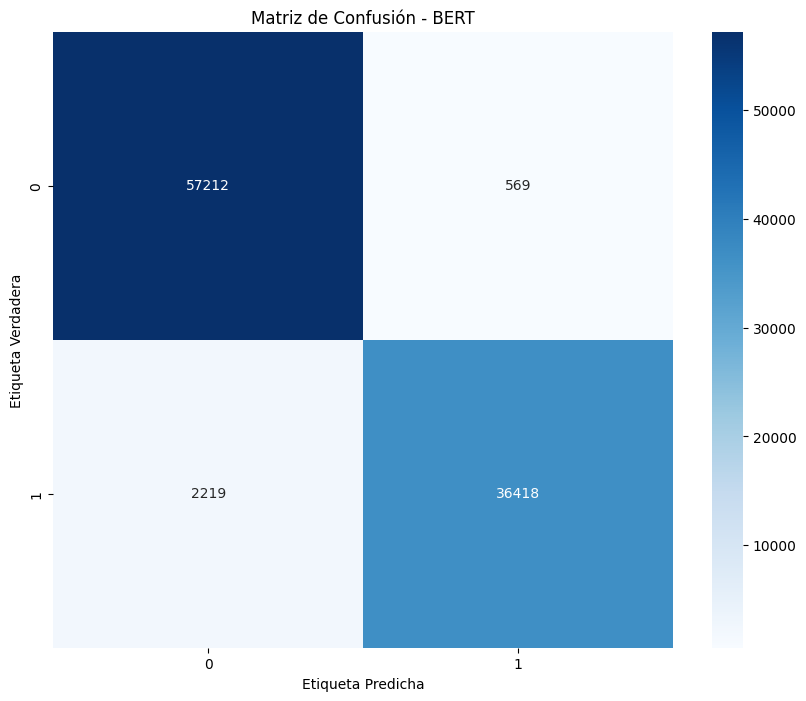
- El modelo logró una precisión global del 97%, lo cual es excelente.
- Para la clase no tóxica (0), obtuvo una precisión del 96% y un recall del 99%.
- Para la clase tóxica (1), alcanzó una precisión del 98% y un recall del 94%.

### 5.5 Comparación con Modelos Basados en Árboles

El rendimiento del modelo BERT (F1-score de 0.97) es ligeramente superior al de nuestros mejores modelos basados en árboles (XGBoost con F1-score de 0.9594). Sin embargo, es importante considerar que:

1. BERT requiere significativamente más recursos computacionales y tiempo de entrenamiento (más de 13 horas frente a los tiempos mucho menores de XGBoost y LightGBM).
2. Los modelos basados en árboles ofrecen mayor interpretabilidad y velocidad de inferencia.

### 5.6 Conclusiones del Experimento BERT

- El modelo BERT fine-tuneado demuestra ser muy efectivo para la detección de textos tóxicos, logrando un rendimiento ligeramente superior a los modelos basados en árboles.
- La alta precisión y recall en ambas clases sugiere que BERT es capaz de capturar matices sutiles en el lenguaje tóxico.
- Este experimento valida la efectividad de los modelos de lenguaje pre-entrenados para tareas de clasificación de texto complejas.
- La elección entre BERT y modelos basados en árboles dependerá de las necesidades específicas del proyecto, considerando el equilibrio entre rendimiento, velocidad de inferencia y recursos computacionales disponibles.

